# Guided Practice/Demo

The following code samples are provided directly from the lesson and should serve as a jumping off point for students to run the code on their own.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import math
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def return_jitter():
    return np.random.random_sample(size=100)

Random = pd.DataFrame({'x':return_jitter(),'y':return_jitter()})

df['x'] = df.x + Random.x
df['y'] = df.y + Random.y

biased_df['x'] = biased_df.x + Random.x
biased_df['y'] = biased_df.y + Random.y

## fit
lm1 = linear_model.LinearRegression().fit(df[['x']], df['y'])
print('unbiased: ',metrics.mean_squared_error(df['y'], lm1.predict(df[['x']]))) #MSE of actual Y and predicted Y

## biased fit
lm2 = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print('biased: ',metrics.mean_squared_error(df['y'], lm2.predict(df[['x']])))

biased_df['predicted_y'] = lm2.predict(df[['x']])
df['predicted_y'] = lm1.predict(df[['x']])

unbiased:  0.187007326997
biased:  0.187015847606


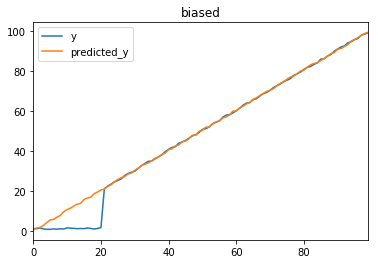

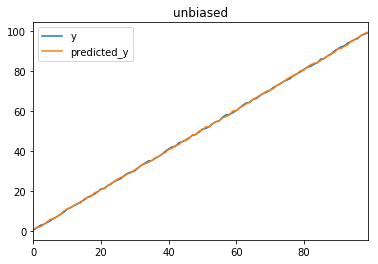

In [2]:
biased_df[['y','predicted_y']].plot(title='biased')
df[['y','predicted_y']].plot(title='unbiased')

In [3]:
from sklearn import cross_validation

bikeshare = pd.read_csv('bikeshare.csv')
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']]) #these join on index
y = bikeshare.casual

kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True) #len(modeldata) is number of observations
                                                                     #n_folds is number of subsets you want
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print(np.mean(scores))

# this score will be lower, but we're trading off bias error for generalized error
lm = linear_model.LinearRegression().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))

1673.22054346
1672.58110765


/Users/zoealdington/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples.

In [4]:
k = range(2,51,2)
final_scores = []
for i in k:
    kf = cross_validation.KFold(len(modeldata), n_folds=i)
    scores = []
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    print(np.mean(scores))
    final_scores.append(np.mean(scores))

1856.09562181
1742.21496325
1762.15716018
1742.80486598
1743.91733572
1730.10025245
1717.41983777
1718.91682842
1713.17906482
1712.25766779
1711.19153497
1705.82573513
1705.91243242
1701.68158412
1704.7671545
1700.56076113
1698.99574904
1696.57330575
1695.77715767
1697.59225511
1696.63702912
1694.79045566
1693.87478207
1693.88438833
1694.17658893


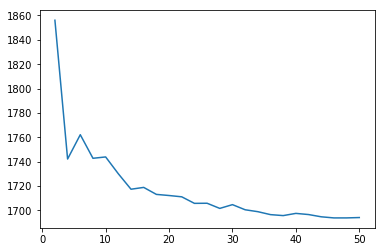

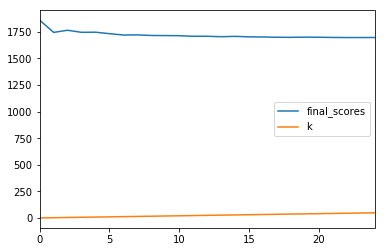

In [5]:
df_plot = pd.DataFrame({'k':k,'final_scores':final_scores})
plt.plot(df_plot['k'],df_plot['final_scores'])
df_plot.plot()

In [6]:
kf = cross_validation.KFold(len(modeldata), n_folds=5)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    
print (np.mean(scores))

1780.97924083


In [7]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print (metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Lasso().fit(modeldata, y)
print (metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Ridge().fit(modeldata, y)
print (metrics.mean_squared_error(y, lm.predict(modeldata)))

# Lasso and Ridge are trying to generalise the model so the error is higher

1672.58110765
1725.41581608
1672.60490113


In [8]:
alphas = np.logspace(-10, 10, 21) # 21 numbers from 10^-10 to 10^10
print(alphas)
results=[]
for a in alphas:
    print(format(a,'.65f')) #change from scientific notation to normal
for a in alphas:
    print('\nAlpha:', a)
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print('coef: ',lm.coef_)
    print('MSE: ',metrics.mean_squared_error(y, lm.predict(modeldata)))
    results.append(metrics.mean_squared_error(y, lm.predict(modeldata)))

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01   1.00000000e+00   1.00000000e+01
   1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06   1.00000000e+07   1.00000000e+08   1.00000000e+09
   1.00000000e+10]
0.00000000010000000000000000364321973154977415791655470655996396090
0.00000000100000000000000006228159145777985641889706869278597878292
0.00000001000000000000000020922560830128472675326634089287836104631
0.00000009999999999999999547481118258862586856139387236908078193665
0.00000099999999999999995474811182588625868561393872369080781936646
0.00001000000000000000081803053914031309545862313825637102127075195
0.00010000000000000000479217360238592959831294137984514236450195312
0.00100000000000000002081668171172168513294309377670288085937500000
0.01000000000000000020816681711721685132943093776702880859375000000
0.1000000000000000055511

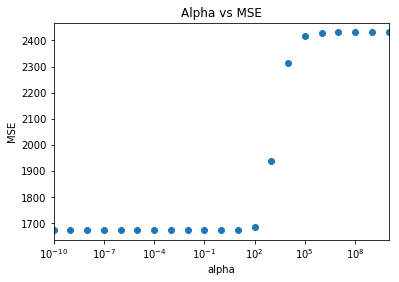

In [9]:
plt.scatter(x=alphas,y=results)
plt.xlim(10**(-10),10**10)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Alpha vs MSE')

In [10]:
from sklearn import grid_search

#grid_search goes through all the parameters and chooses the best one for the model

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(fit_intercept=True), #fit_intercept=False
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error', cv=10) # by default, uses 3-fold cross validation

gs.fit(modeldata, y)

print ('\n',-gs.best_score_) # mean squared error here comes in negative, so let's make it positive.
print ('\n',gs.best_estimator_) # explains which grid_search setup worked best

for i in np.arange(len(gs.grid_scores_)):
    print ('\n',gs.grid_scores_[i]) # shows all the grid pairings and their performances.

/Users/zoealdington/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)



 1742.3475983361247

 Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 mean: -1743.92970, std: 1051.57802, params: {'alpha': 1e-10}

 mean: -1743.92970, std: 1051.57802, params: {'alpha': 1.0000000000000001e-09}

 mean: -1743.92970, std: 1051.57802, params: {'alpha': 1e-08}

 mean: -1743.92970, std: 1051.57802, params: {'alpha': 9.9999999999999995e-08}

 mean: -1743.92970, std: 1051.57802, params: {'alpha': 9.9999999999999995e-07}

 mean: -1743.92970, std: 1051.57802, params: {'alpha': 1.0000000000000001e-05}

 mean: -1743.92968, std: 1051.57808, params: {'alpha': 0.0001}

 mean: -1743.92951, std: 1051.57864, params: {'alpha': 0.001}

 mean: -1743.92784, std: 1051.58418, params: {'alpha': 0.01}

 mean: -1743.91380, std: 1051.63647, params: {'alpha': 0.10000000000000001}

 mean: -1743.77710, std: 1052.14163, params: {'alpha': 1.0}

 mean: -1742.34760, std: 1057.35486, params: {'alpha': 10.0}

 mean: -17

In [11]:
# without fitting intercept

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(fit_intercept=False),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error') # by default, uses 3-fold cross validation

gs.fit(modeldata, y)

print ('\n',-gs.best_score_) # mean squared error here comes in negative, so let's make it positive.
print ('\n',gs.best_estimator_) # explains which grid_search setup worked best

for i in np.arange(len(gs.grid_scores_)):
    print ('\n',gs.grid_scores_[i]) # shows all the grid pairings and their performances.


 1813.6070007308547

 Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 mean: -1818.23138, std: 542.35715, params: {'alpha': 1e-10}

 mean: -1818.23138, std: 542.35715, params: {'alpha': 1.0000000000000001e-09}

 mean: -1818.23138, std: 542.35715, params: {'alpha': 1e-08}

 mean: -1818.23138, std: 542.35715, params: {'alpha': 9.9999999999999995e-08}

 mean: -1818.23138, std: 542.35715, params: {'alpha': 9.9999999999999995e-07}

 mean: -1818.23137, std: 542.35717, params: {'alpha': 1.0000000000000001e-05}

 mean: -1818.23132, std: 542.35733, params: {'alpha': 0.0001}

 mean: -1818.23082, std: 542.35893, params: {'alpha': 0.001}

 mean: -1818.22575, std: 542.37494, params: {'alpha': 0.01}

 mean: -1818.17522, std: 542.53495, params: {'alpha': 0.10000000000000001}

 mean: -1817.67959, std: 544.12728, params: {'alpha': 1.0}

 mean: -1813.60700, std: 559.32644, params: {'alpha': 10.0}

 mean: -1818.35148, s

In [12]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print (distance, 'is better than', current_distance)
            current_distance = distance
            start = n
    if got_better:
        print ('found better solution! using', current_distance)
        a += 1
    else:
        optimized = True
        print (start, 'is closest to', num_to_approach)


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2000000000000002
found better solution! using 0.2
6.0 is closest to 6.2


In [13]:
lm = linear_model.SGDRegressor() # Stochastic Gradient Descent
lm.fit(modeldata, y)
print (lm.score(modeldata, y)) # lm.score is the R2 value
print (metrics.mean_squared_error(y, lm.predict(modeldata)))

0.308471246783
1681.00000101


# Independent Practice

Use the following code to work through the problems given.


1. With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
2. We know when to properly use l1 vs l2 regularization based on the data. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true?
    * (if it didn't look like it, did gradient descent have enough iterations?)
3. How do results change when you alter the learning rate (power_t)? learning rate is how far you jump along to find the minimum

In [18]:
alphas = np.logspace(-10, -1, 10)
print(alphas)
params = {'alpha':alphas, } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
#print(grid)
#grid[[0]] = grid.apply(lambda x: x['alpha'])
#grid[[1]] = grid.apply(lambda x: -x)
#
#grid['parameters']
grid['mean_validation_score'] = grid['mean_validation_score'].apply(lambda x: -x)
grid.columns = ['alpha', 'mean_squared_error', 'cv']
grid

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


,alpha,mean_squared_error,cv
0,{'alpha': 1e-10},1689.729590,"[-1694.37864584, -1736.33164067, -1694.1293434..."
1,{'alpha': 1e-09},1689.844550,"[-1699.91983687, -1736.74991514, -1694.6556798..."
2,{'alpha': 1e-08},1688.640870,"[-1693.57274368, -1737.16703793, -1693.8391889..."
3,{'alpha': 1e-07},1688.557503,"[-1694.82409951, -1736.75831987, -1693.4916797..."
4,{'alpha': 1e-06},1688.731854,"[-1692.78470662, -1736.35116665, -1693.5318587..."
5,{'alpha': 1e-05},1688.077164,"[-1692.53367272, -1736.6227579, -1693.11141655..."
6,{'alpha': 0.0001},1689.584444,"[-1694.13491976, -1736.70525378, -1695.5163770..."
7,{'alpha': 0.001},1691.682691,"[-1695.72422667, -1739.04583137, -1697.6479886..."
8,{'alpha': 0.01},1729.824541,"[-1734.35410453, -1774.93115125, -1744.9383181..."
9,{'alpha': 0.1},2054.086868,"[-2062.50733611, -2092.48673306, -2087.9537471..."


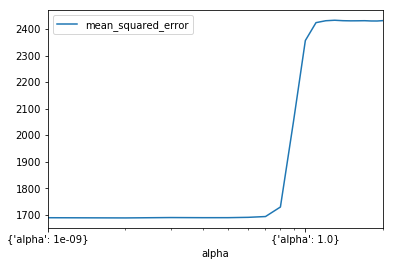

In [17]:
grid.plot('alpha','mean_squared_error',logx=True)

#reduce variance and bias as much as possible so that the model is generalised for new data and not just the
#training set i.e. make sure it is not overfitted

In [19]:
l1_2_ratios = [float(i) / 100 for i in range(0, 101, 5)]
print(l1_2_ratios)
params = {'l1_ratio':l1_2_ratios, 'penalty': ['elasticnet'], 'alpha': [.1], 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid['mean_validation_score'] = grid['mean_validation_score'].apply(lambda x: -x)
grid.columns = ['l1_ratio', 'neg_mean_squared_error', 'cv']
grid


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


,l1_ratio,neg_mean_squared_error,cv
0,"{'alpha': 0.1, 'l1_ratio': 0.0, 'n_iter': 50, ...",2053.515265,"[-2007.2333103, -1887.1003618, -2265.4807322, ..."
1,"{'alpha': 0.1, 'l1_ratio': 0.05, 'n_iter': 50,...",2042.613418,"[-1996.99378721, -1877.48474751, -2259.7232334..."
2,"{'alpha': 0.1, 'l1_ratio': 0.1, 'n_iter': 50, ...",2032.674570,"[-1989.27444764, -1867.14725696, -2246.4334118..."
3,"{'alpha': 0.1, 'l1_ratio': 0.15, 'n_iter': 50,...",2020.491573,"[-1975.41902565, -1855.59408131, -2234.0683605..."
4,"{'alpha': 0.1, 'l1_ratio': 0.2, 'n_iter': 50, ...",2010.064468,"[-1966.39604041, -1846.46001344, -2226.5974436..."
5,"{'alpha': 0.1, 'l1_ratio': 0.25, 'n_iter': 50,...",1996.985614,"[-1951.35311307, -1831.16824884, -2211.2287733..."
6,"{'alpha': 0.1, 'l1_ratio': 0.3, 'n_iter': 50, ...",1981.782116,"[-1938.18953355, -1817.56889618, -2193.5618782..."
7,"{'alpha': 0.1, 'l1_ratio': 0.35, 'n_iter': 50,...",1967.599962,"[-1923.25090497, -1809.05167815, -2181.5264886..."
8,"{'alpha': 0.1, 'l1_ratio': 0.4, 'n_iter': 50, ...",1950.801771,"[-1907.51249791, -1788.89860384, -2163.4003957..."
9,"{'alpha': 0.1, 'l1_ratio': 0.45, 'n_iter': 50,...",1934.368380,"[-1891.90843916, -1772.01144893, -2151.9940011..."


In [20]:
gs.best_estimator_

SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=1.0, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='elasticnet', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

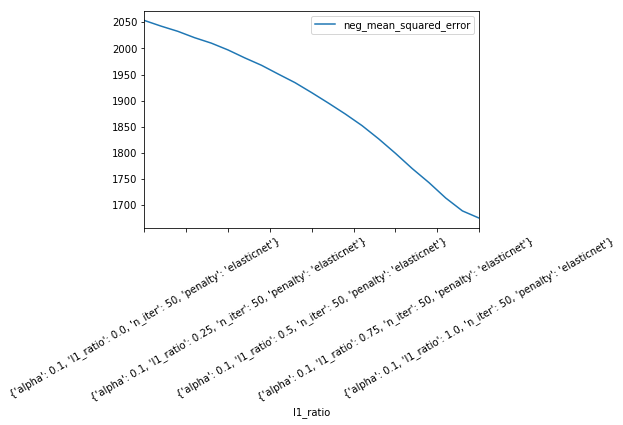

In [21]:
grid.plot('l1_ratio', 'neg_mean_squared_error',rot=30)

In [22]:
learning = list(range(1,50))
print(learning)
params = {'eta0':list(range(1,50)), 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.columns = ['eta0', 'neg_mean_squared_error', 'cv']
grid['neg_mean_squared_error'] = grid['neg_mean_squared_error'].apply(lambda x: -x)
grid

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


,eta0,neg_mean_squared_error,cv
0,"{'eta0': 1, 'n_iter': 50}",1.752688e+03,"[-1826.11666465, -1845.63776216, -1839.8903385..."
1,"{'eta0': 2, 'n_iter': 50}",1.947728e+03,"[-1622.80424077, -2145.82600353, -2087.9320258..."
2,"{'eta0': 3, 'n_iter': 50}",2.207291e+09,"[-1753.62016079, -1854.56748461, -11019133846...."
3,"{'eta0': 4, 'n_iter': 50}",2.243396e+04,"[-1611.91672195, -1918.86860848, -1869.4202399..."
4,"{'eta0': 5, 'n_iter': 50}",2.728189e+03,"[-5071.82085193, -2136.6148909, -1828.05792685..."
5,"{'eta0': 6, 'n_iter': 50}",1.905749e+03,"[-2311.24168868, -2023.38613289, -1794.0761329..."
6,"{'eta0': 7, 'n_iter': 50}",2.411455e+03,"[-1642.82353354, -2051.94192699, -1968.4038302..."
7,"{'eta0': 8, 'n_iter': 50}",2.466710e+03,"[-1723.26731149, -1858.28908332, -3833.5787493..."
8,"{'eta0': 9, 'n_iter': 50}",1.990536e+03,"[-2172.9521188, -2048.58805967, -2135.95187824..."
9,"{'eta0': 10, 'n_iter': 50}",3.479779e+03,"[-2701.36954651, -6399.07621538, -2085.6764044..."


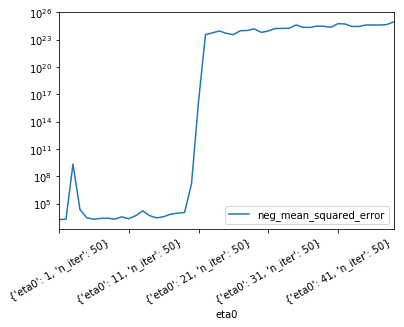

In [24]:
grid.plot('eta0', 'neg_mean_squared_error', logy=True, rot=30)